In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']

Text(0, 0.5, 'Spending Score (1-100)')

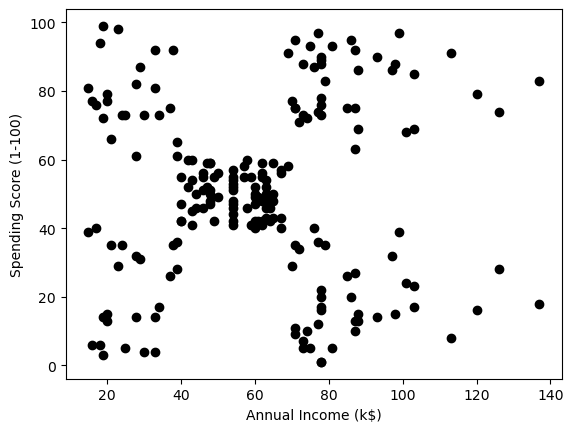

In [39]:
plt.scatter(df[features[0]], df[features[1]], c = 'black')
plt.xlabel(features[0])
plt.ylabel(features[1])

In [41]:
X = df[features]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


     Annual Income (k$)  Spending Score (1-100)           1          2  \
43                   39                      61   65.280697  52.022172   
79                   54                      42   41.656165  51.662601   
19                   23                      98  103.244384  65.490839   
78                   54                      52   48.203417  44.344788   
178                  93                      14    6.356318  68.433938   

             3  Cluster          4          5  
43   19.652361        3  22.658076  42.049300  
79    7.788794        3  46.854972  34.809609  
19   57.976636        4  18.834863  77.157745  
78    2.532847        3  39.346101  41.634697  
178  52.083974        1  93.797787  67.052966  


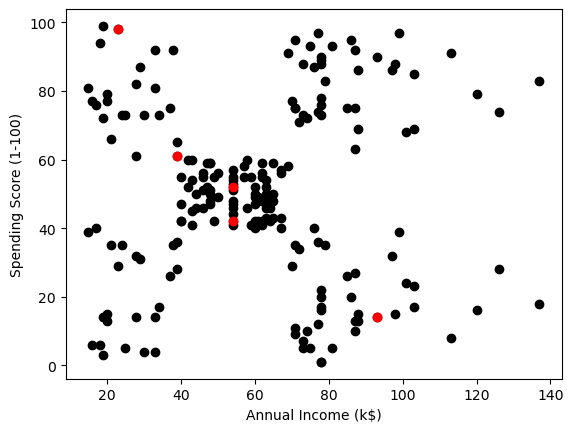

In [70]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)
plt.scatter(X[features[0]],X[features[1]],c='black')
plt.scatter(Centroids[features[0]],Centroids[features[1]],c='red')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

In [72]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c[features[0]]-row_d[features[0]])**2
            d2=(row_c[features[1]]-row_d[features[1]])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    print(X)
    Centroids_new = X.groupby(["Cluster"]).mean()[[features[0],features[1]]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new[features[0]] - Centroids[features[0]]).sum() + (Centroids_new[features[1]] - Centroids[features[1]]).sum()
        print("Difference :: ",diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[[features[0],features[1]]]

     Annual Income (k$)  Spending Score (1-100)           1          2  \
0                    15                      39   32.557641  39.115214   
1                    15                      81   31.240999  55.154329   
2                    16                       6   59.615434  52.345009   
3                    16                      77   28.017851  51.662365   
4                    17                      40   30.413813  37.054015   
..                  ...                     ...         ...        ...   
195                 120                      79   82.975900  75.663730   
196                 126                      28   93.048375  73.348483   
197                 126                      74   87.965902  78.790862   
198                 137                      18  107.018690  86.400231   
199                 137                      83  100.439036  92.574294   

              3  Cluster          4           5  
0     59.539903        1  41.109610   81.908486  
1     18.78

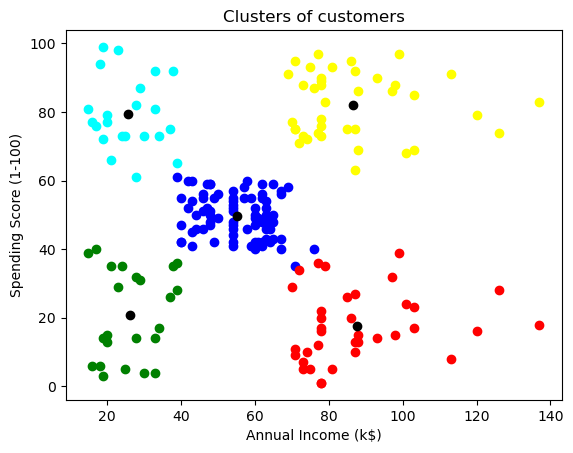

In [77]:
color=['blue','green','cyan','yellow', 'red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data[features[0]],data[features[1]],c=color[k])
plt.scatter(Centroids[features[0]],Centroids[features[1]],c='black')
plt.title('Clusters of customers')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()